Earthquake Prediction Model with Machine Learning

It is well known that if a disaster occurs in one region, it is likely to happen again. Some regions have frequent earthquakes, but this is only a comparative amount compared to other regions.

So, predicting the earthquake with date and time, latitude and longitude from previous data is not a trend that follows like other things, it happens naturally.

In [36]:
#analysing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
#loading the data
data = pd.read_csv("database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [38]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [39]:
#extract the usefull data

data=data[['Date', 'Time', 'Latitude', 'Longitude','Magnitude','Depth']]
data.head()

,Date,Time,Latitude,Longitude,Magnitude,Depth
0,01/02/1965,13:44:18,19.246,145.616,6.0,131.6
1,01/04/1965,11:29:49,1.863,127.352,5.8,80.0
2,01/05/1965,18:05:58,-20.579,-173.972,6.2,20.0
3,01/08/1965,18:49:43,-59.076,-23.557,5.8,15.0
4,01/09/1965,13:32:50,11.938,126.427,5.8,15.0


Since the data is random, so we need to scale it based on the model inputs. In this, we convert the given date and time to Unix time which is in seconds and a number.

In [40]:
import pandas as pd
import datetime
import numpy as np

# Safe datetime parsing
def safe_parse_datetime(date_str, time_str):
    try:
        dt = datetime.datetime.strptime(date_str + ' ' + time_str, '%m/%d/%Y %H:%M:%S')
        return dt.timestamp()  # Convert to UNIX timestamp
    except Exception:
        return np.nan

# Apply to each row
data['Timestamp'] = [safe_parse_datetime(d, t) for d, t in zip(data['Date'], data['Time'])]

# Drop invalid entries
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data.dropna(subset=['Timestamp']).reset_index(drop=True)

# Show first few rows
final_data.head()


,Latitude,Longitude,Magnitude,Depth,Timestamp
0,24.185,102.543,7.1,11.3,300641.0
1,23.984,102.732,5.9,15.0,368350.0
2,-9.583,151.493,6.3,15.0,432354.0
3,15.785,-59.808,6.0,36.7,527174.0
4,-34.850,178.782,6.8,199.4,646961.0


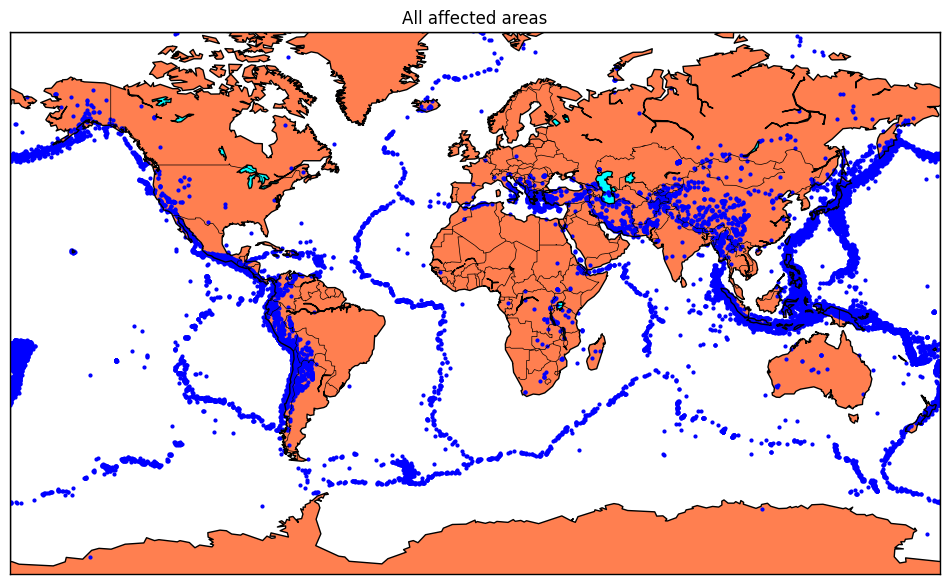

In [41]:
#visualization
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

Splitting the Dataset

Now, to create the earthquake prediction model, we need to divide the data into Xs and ys which respectively will be entered into the model as inputs to receive the output from the model.

Here the inputs are TImestamp, Latitude and Longitude and the outputs are Magnitude and Depth. I’m going to split the xs and ys into train and test with validation. The training set contains 80% and the test set contains 20%:

In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [43]:
scaler = StandardScaler()
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
X_scaled = scaler.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split


y = final_data['Magnitude'].values.ravel()  # not a DataFrame, but a 1D array



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(17561, 3) (4391, 3) (17561,) (4391, 3)


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    r2_score, mean_squared_error
)

import joblib
import os



In [47]:

problem_type = 'regression'  # Change to 'classification' if needed



In [48]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor
)
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

if problem_type == 'classification':
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(),
        'Naive Bayes': GaussianNB(),
        'Gradient Boosting': GradientBoostingClassifier()
    }
else:
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        'Random Forest Regressor': RandomForestRegressor(),
        'KNN Regressor': KNeighborsRegressor(),
        'SVR': SVR(),
        'Gradient Boosting Regressor': GradientBoostingRegressor()
    }


In [49]:
save_path = "saved_models"
os.makedirs(save_path, exist_ok=True)


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize



🚀 Training, Evaluating, and Saving: Linear Regression
💾 Model saved at: saved_models\linear_regression.pkl
📚 Cross-Validation Mean Score: 0.0015
✅ R² Score: -0.0008
✅ RMSE: 0.4343


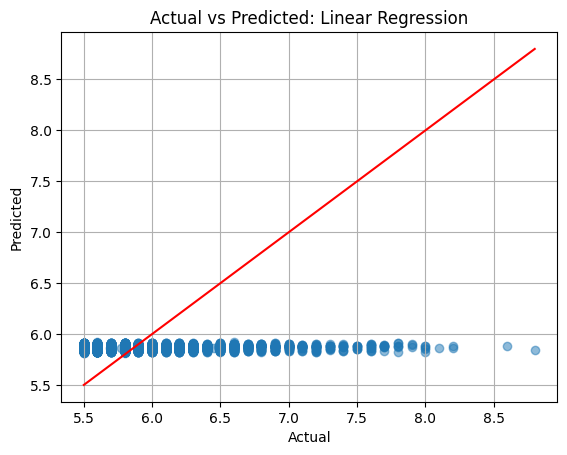


🚀 Training, Evaluating, and Saving: Decision Tree Regressor
💾 Model saved at: saved_models\decision_tree_regressor.pkl
📚 Cross-Validation Mean Score: -0.8763
✅ R² Score: -0.8611
✅ RMSE: 0.5922


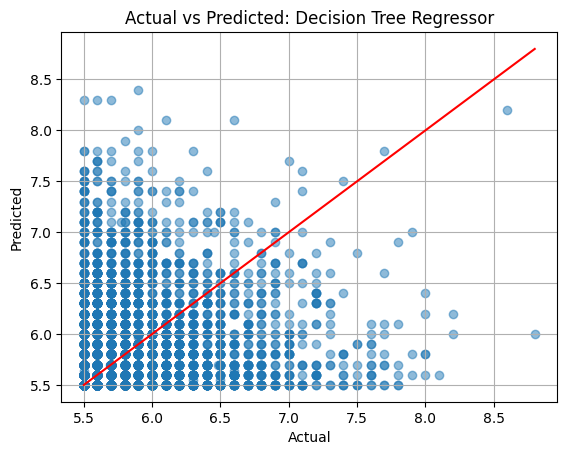


🚀 Training, Evaluating, and Saving: Random Forest Regressor
💾 Model saved at: saved_models\random_forest_regressor.pkl
📚 Cross-Validation Mean Score: -0.0741
✅ R² Score: -0.0947
✅ RMSE: 0.4542


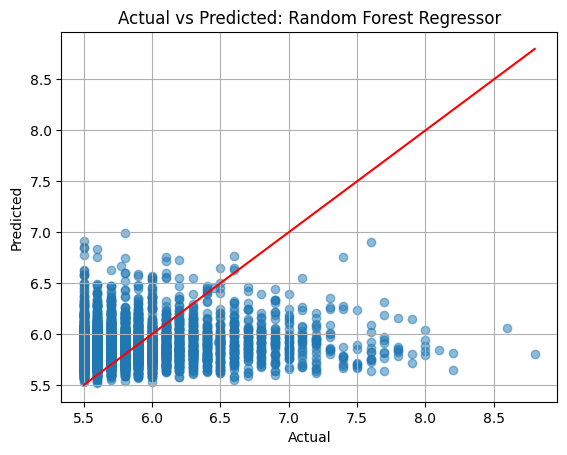


🚀 Training, Evaluating, and Saving: KNN Regressor
💾 Model saved at: saved_models\knn_regressor.pkl
📚 Cross-Validation Mean Score: -0.1696
✅ R² Score: -0.1858
✅ RMSE: 0.4727


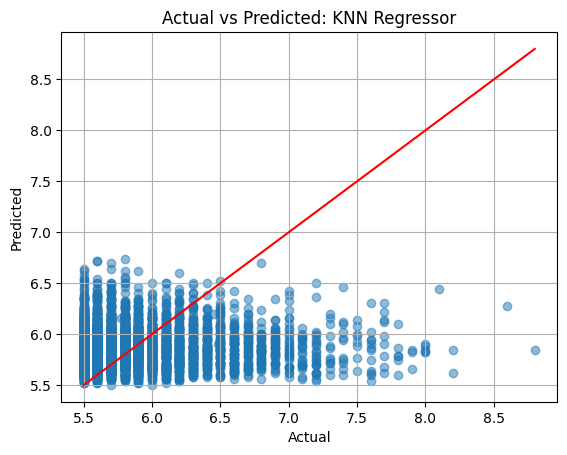


🚀 Training, Evaluating, and Saving: SVR
💾 Model saved at: saved_models\svr.pkl
📚 Cross-Validation Mean Score: -0.0941
✅ R² Score: -0.0598
✅ RMSE: 0.4469


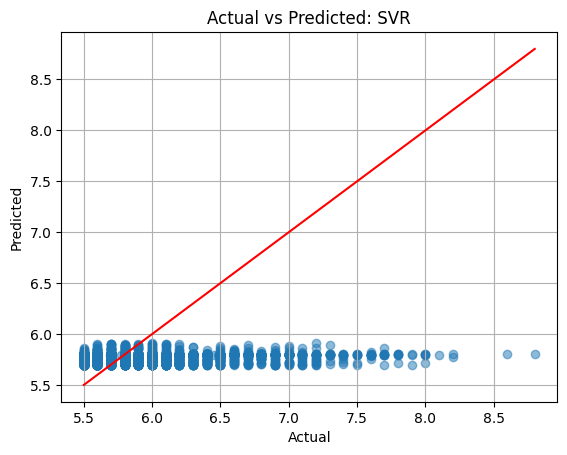


🚀 Training, Evaluating, and Saving: Gradient Boosting Regressor
💾 Model saved at: saved_models\gradient_boosting_regressor.pkl
📚 Cross-Validation Mean Score: 0.0031
✅ R² Score: 0.0133
✅ RMSE: 0.4312


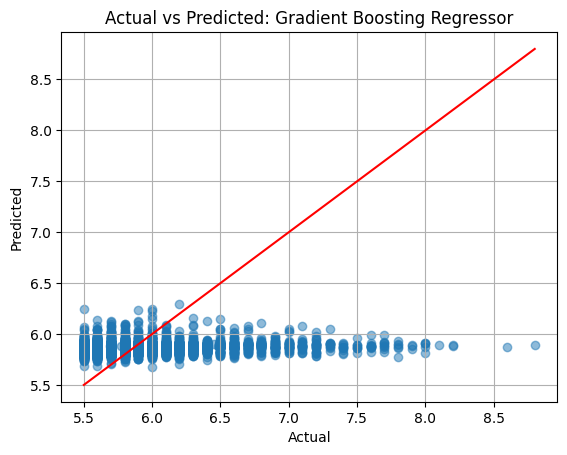

In [51]:
results = []

for name, model in models.items():
    print(f"\n🚀 Training, Evaluating, and Saving: {name}")
    
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Save the model
    filename = os.path.join(save_path, name.replace(" ", "_").lower() + ".pkl")
    joblib.dump(model, filename)
    print(f"💾 Model saved at: {filename}")
    
    # Cross-Validation (5-fold)
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    mean_cv = np.mean(cv_scores)
    print(f"📚 Cross-Validation Mean Score: {mean_cv:.4f}")

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"✅ R² Score: {r2:.4f}")
    print(f"✅ RMSE: {rmse:.4f}")
    
    # Regression Scatter Plot
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.title(f'Actual vs Predicted: {name}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    
    results.append({'Model': name, 'R2 Score': r2, 'RMSE': rmse, 'Cross-Val Score': mean_cv})